<a href="https://colab.research.google.com/github/SebastianPerezCalle/Se-ales-y-Sistemas/blob/main/Ejercicios_Modelado_de_SLITs_Senales_y_Sistemas_2024_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ecuación diferencial del sistema
El sistema masa-resorte-amortiguador está gobernado por la ecuación diferencial:
\section{Ecuaci'on diferencial del sistema}
El sistema masa-resorte-amortiguador está gobernado por la ecuación diferencial:

\begin{equation}
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_E(t)
\end{equation}

Donde:

 - $m$ es la masa,
 - $c$ es el coeficiente de amortiguamiento,
 - $k$ es la constante del resorte,
 - $y(t)$ es el desplazamiento de la masa,
 - $F_E(t)$ es la fuerza externa aplicada.

Este es un sistema de segundo orden con coeficientes constantes.

\section{Funci'on de transferencia}
Aplicamos la Transformada de Laplace (asumiendo condiciones iniciales en cero):

\begin{equation}
m s^2 Y(s) + c s Y(s) + k Y(s) = F_E(s)
\end{equation}

Factorizando $Y(s)$:

\begin{equation}
Y(s) (m s^2 + c s + k) = F_E(s)
\end{equation}

La función de transferencia $H(s)$ está definida como:

\begin{equation}
H(s) = \frac{Y(s)}{F_E(s)}
\end{equation}

Sustituyendo:

\begin{equation}
H(s) = \frac{1}{m s^2 + c s + k}
\end{equation}

Esta es la función de transferencia del sistema masa-resorte-amortiguador.

\section{Equivalencia con el circuito RLC}
Comparando con la ecuación diferencial de un circuito RLC serie:

\begin{equation}
L \frac{d^2 u_o(t)}{dt^2} + R \frac{d u_o(t)}{dt} + \frac{1}{C} u_o(t) = \frac{1}{C} u_i(t)
\end{equation}

Obtenemos la equivalencia:

- masa $m$  =  Inductancia $L$
- amortiguador $c$  =  	Resistencia $R$
- peso $k$  =  Inversa de la capacitancia $1/C$


Esto nos permite modelar el sistema mecánico usando un circuito eléctrico equivalente.

Analizando sistema mecánico con c = 0.5


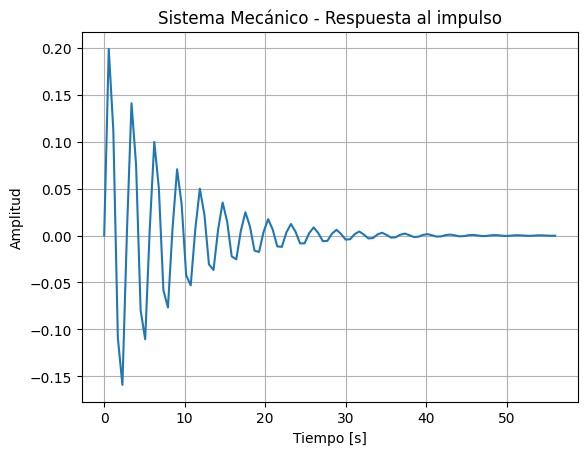

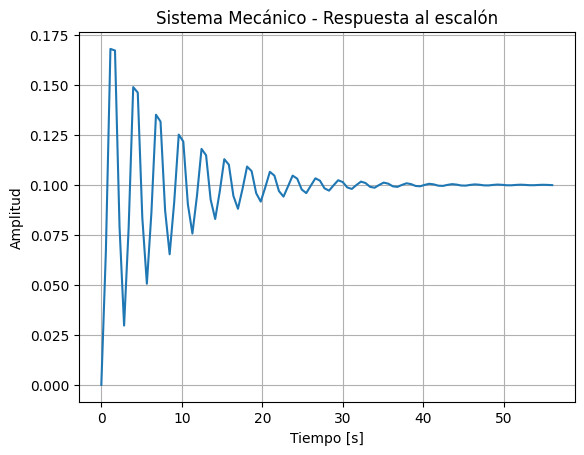

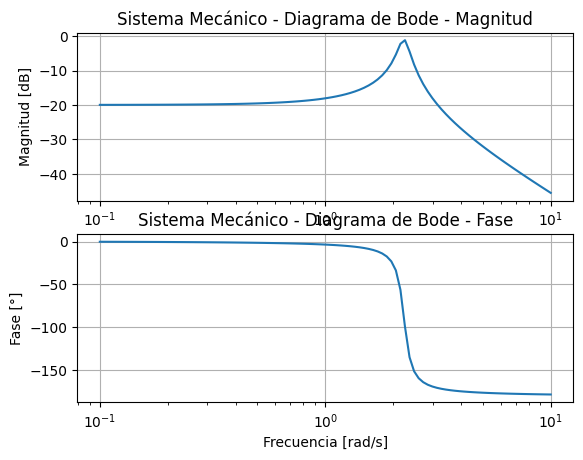

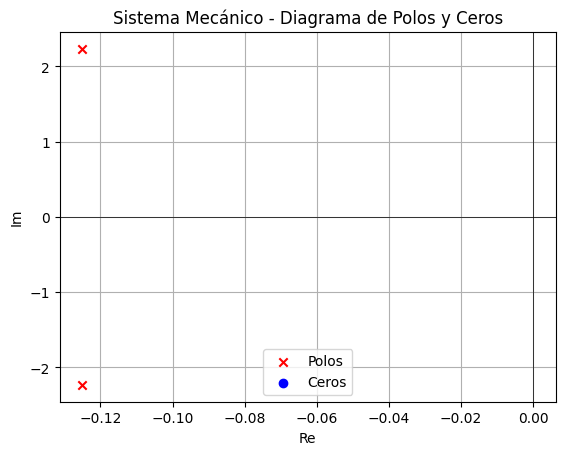

Analizando sistema eléctrico equivalente con R = 0.5, L = 2, C = 0.1


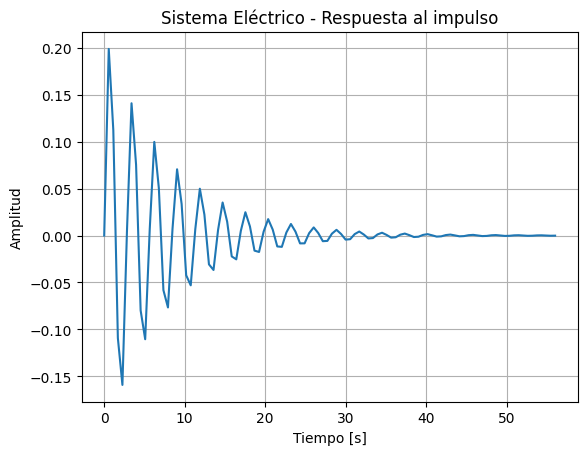

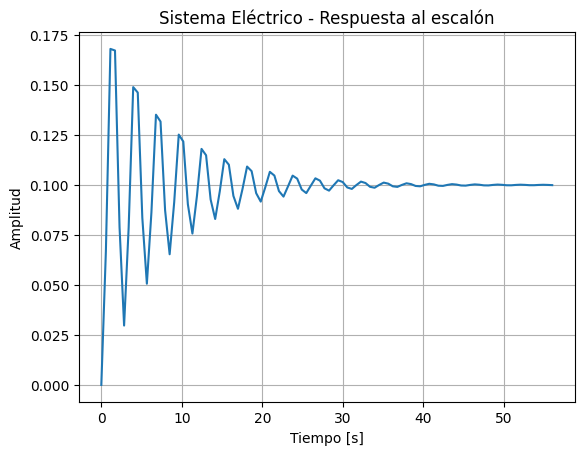

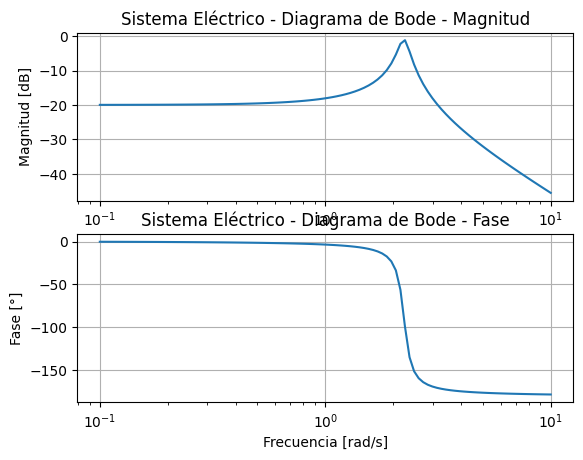

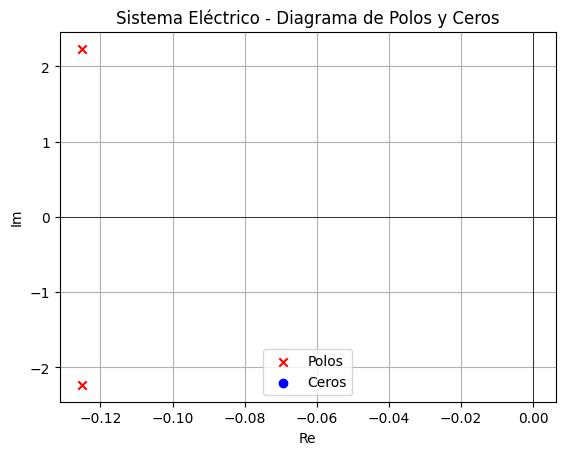

Analizando sistema mecánico con c = 8.94427190999916


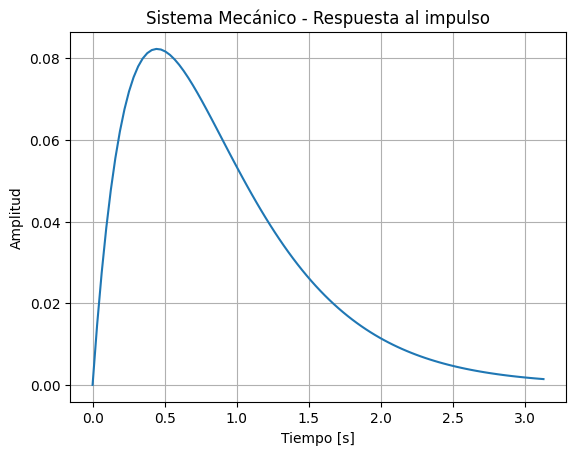

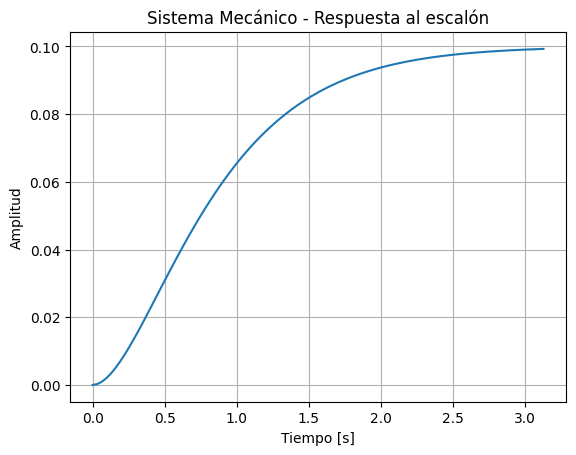

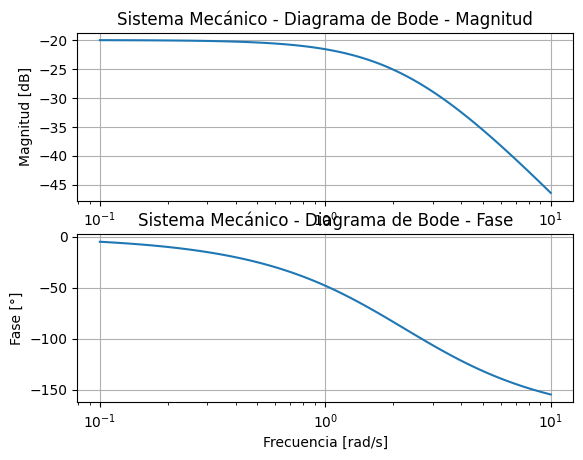

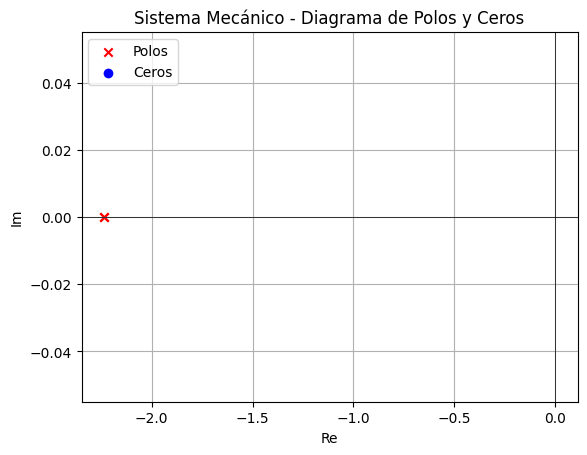

Analizando sistema eléctrico equivalente con R = 8.94427190999916, L = 2, C = 0.1


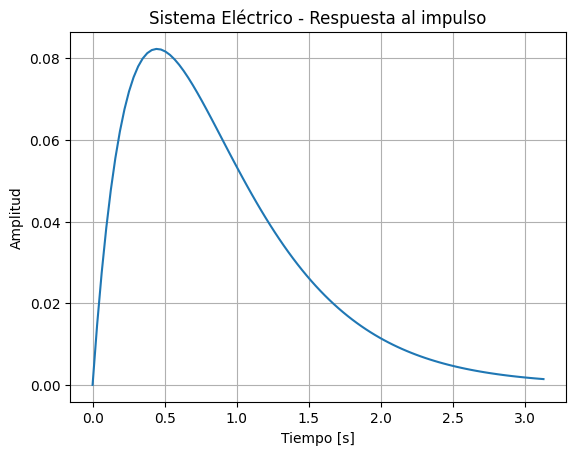

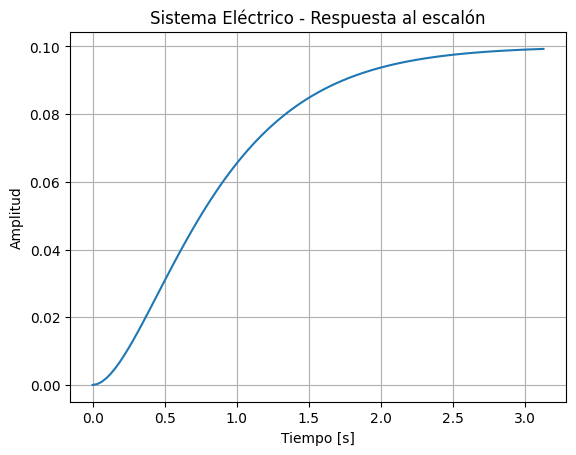

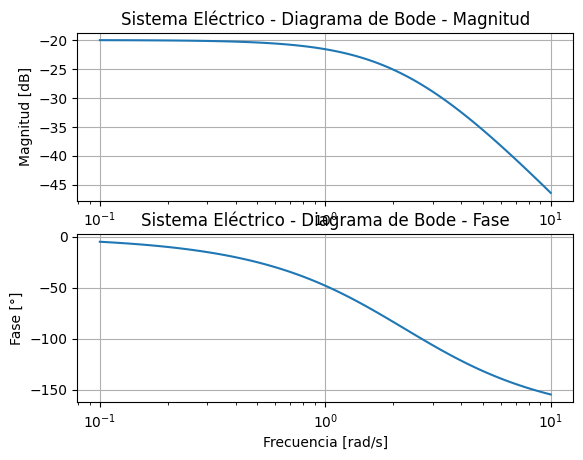

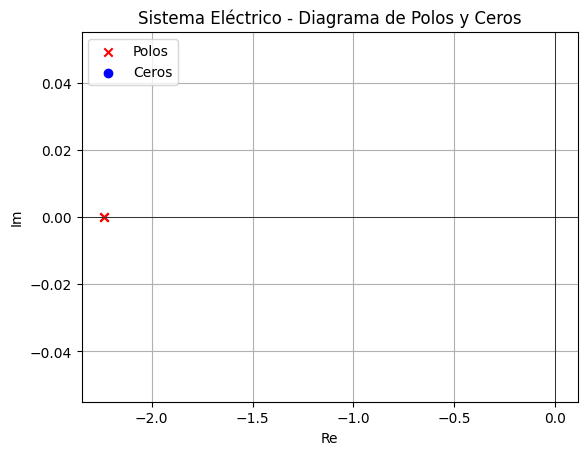

Analizando sistema mecánico con c = 17.88854381999832


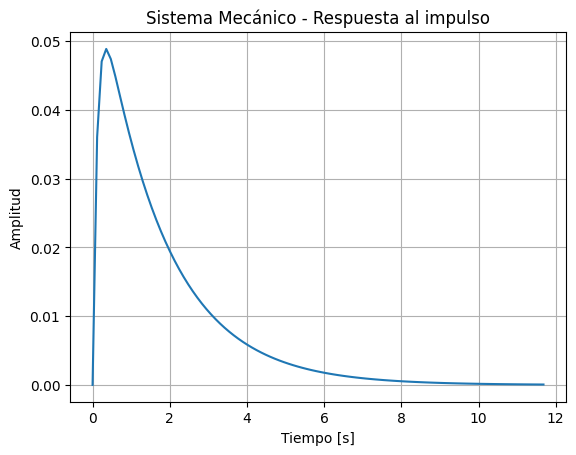

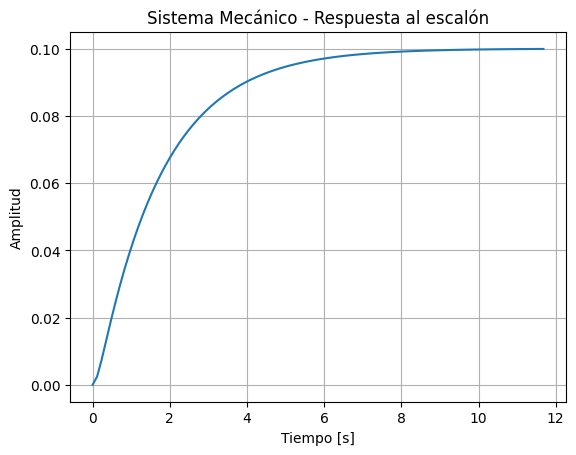

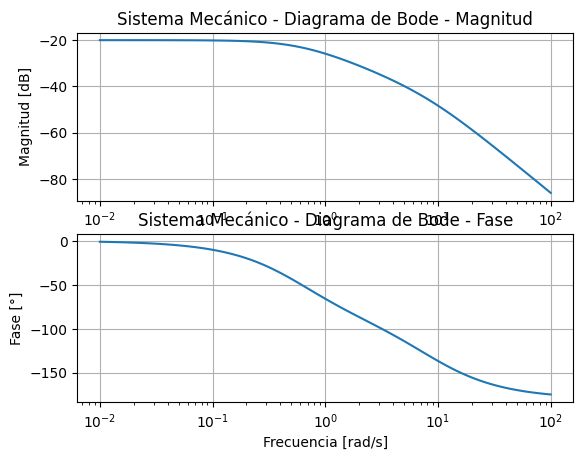

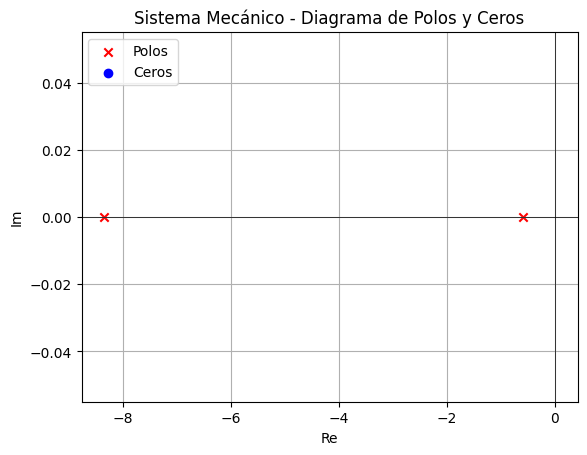

Analizando sistema eléctrico equivalente con R = 17.88854381999832, L = 2, C = 0.1


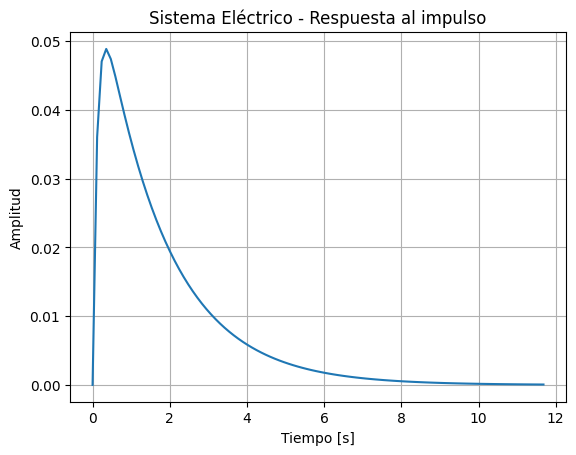

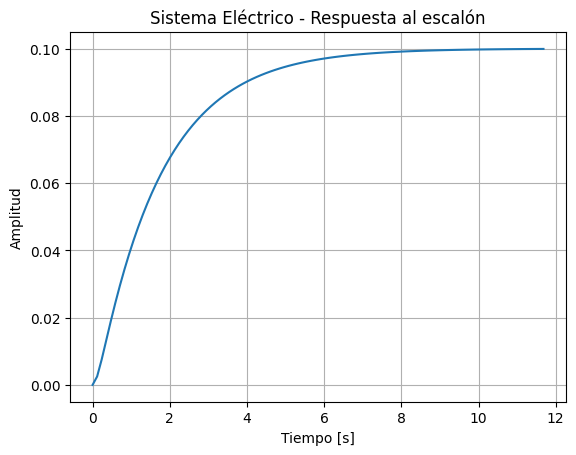

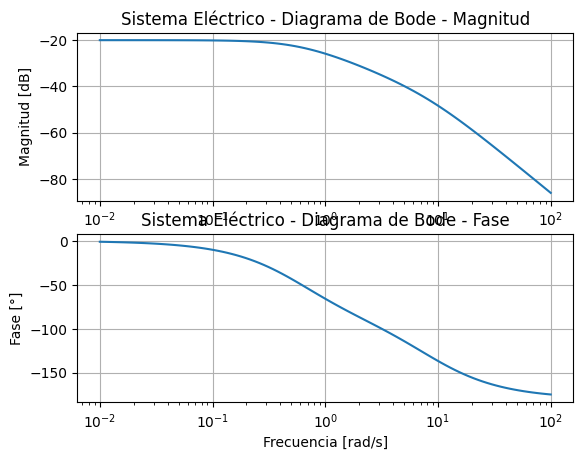

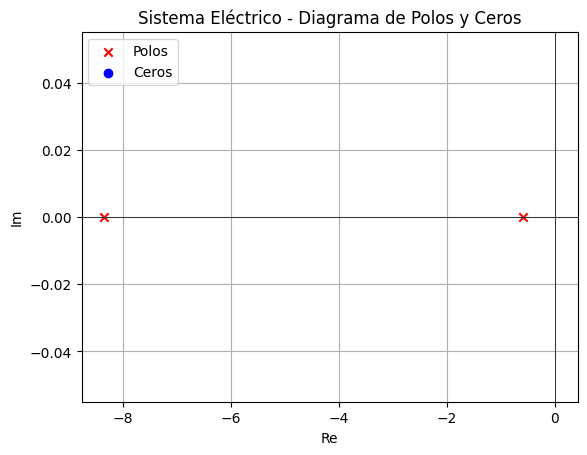

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import sympy as sym

def second_order_system(m, k, c):
    """
    Obtiene la función de transferencia de un sistema de segundo orden masa-resorte-amortiguador.
    """
    num = [1]
    den = [m, c, k]
    system = signal.TransferFunction(num, den)
    return system

def rlc_equivalent(L, R, C):
    """
    Obtiene la función de transferencia del circuito RLC equivalente.
    """
    num = [1]
    den = [L, R, 1/C]
    system = signal.TransferFunction(num, den)
    return system

def analyze_system(system, title):
    """
    Analiza la respuesta del sistema en términos de polos, ceros, Bode, y respuesta temporal.
    """
    t, y = signal.impulse(system)
    plt.figure()
    plt.plot(t, y)
    plt.title(f"{title} - Respuesta al impulso")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.show()

    t, y = signal.step(system)
    plt.figure()
    plt.plot(t, y)
    plt.title(f"{title} - Respuesta al escalón")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.grid()
    plt.show()

    w, mag, phase = signal.bode(system)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.semilogx(w, mag)
    plt.title(f"{title} - Diagrama de Bode - Magnitud")
    plt.xlabel("Frecuencia [rad/s]")
    plt.ylabel("Magnitud [dB]")
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogx(w, phase)
    plt.title(f"{title} - Diagrama de Bode - Fase")
    plt.xlabel("Frecuencia [rad/s]")
    plt.ylabel("Fase [°]")
    plt.grid()
    plt.show()

    poles, zeros = system.poles, system.zeros
    plt.figure()
    plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red', label='Polos')
    plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='blue', label='Ceros')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid()
    plt.title(f"{title} - Diagrama de Polos y Ceros")
    plt.xlabel("Re")
    plt.ylabel("Im")
    plt.legend()
    plt.show()

def critical_damping(m, k):
    """
    Calcula el coeficiente de amortiguamiento crítico.
    """
    return 2 * np.sqrt(m * k)

# Definir parámetros del sistema
m = 2  # Masa en kg
k = 10  # Constante del resorte en N/m
c_critico = critical_damping(m, k)
c_values = [0.5, c_critico, 2 * c_critico]  # Subamortiguado, críticamente amortiguado y sobreamortiguado

for c in c_values:
    print(f"Analizando sistema mecánico con c = {c}")
    system = second_order_system(m, k, c)
    analyze_system(system, "Sistema Mecánico")

    # Sistema eléctrico equivalente
    L = m
    R = c
    C = 1/k
    print(f"Analizando sistema eléctrico equivalente con R = {R}, L = {L}, C = {C}")
    system_elec = rlc_equivalent(L, R, C)
    analyze_system(system_elec, "Sistema Eléctrico")
